## Numpy - база

Numpy - один из важнейших пакетов для численных расчетов в  Python.
Numpy предлагает:
- **ndarray**, эффективный многомерный массив, предоставляющий быстрые арифметические операции с массивами и гибкий механизм укладывания;
- математические функции для выполнения быстрых операций над целыми массивами без явного выписывания циклов;
- средства для чтения массива данных с диска и записи его на диск, а также для работы с проецируемыми на память файлами;
- алгоритмы линейной алгебры, генерация случайных чисел и преобразование Фурье;
- средства для интеграции с кодом, написанным на C, C++ или Fortran.


NumPy **хранит данные в непрерывном блоке памяти** независимо от других встроенных объектов Python. Алгоритмы NumPy, написанные на языке C, могут работать с  этим блоком, не  обременяя себя проверкой типов и другими накладными расходами. Массивы NumPy **потребляют гораздо меньше памяти**, чем встроенные в Python последовательности.

В NumPy сложные **операции применяются к массивам целиком**, так что отпадает необходимость в циклах for, которые для больших последовательностей могут **работать медленно**. NumPy быстрее кода на чистом Python, потому что в  написанных на C  алгоритмах **нет накладных расходов**, свойственных обычному интерпретируемому Python-коду.

Рассмотрим массив NumPy, содержащий 1 миллион чисел и аналогичный список Python:

In [82]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

%timeit my_arr2 = my_arr * 2

%timeit my_list2 = [x * 2 for x in my_list]

1.62 ms ± 28.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
38.1 ms ± 824 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### **ndarray** - объект многомерного массива
Одна из ключевых особенностей NumPy - объект `ndarry` для представления N-мерного массива; это быстрый и гибкий контейнер для хранения больших наборов данных в Python. Массивы позволяют **применять математические операции к блокам данных, используя тот же синтаксис, что и со скалярами**.

In [83]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

print("Data ==>\n", data)
print("Data * 10 ==>\n", data * 10)
print("Data + Data ==>\n", data + data)

Data ==>
 [[ 1.5 -0.1  3. ]
 [ 0.  -3.   6.5]]
Data * 10 ==>
 [[ 15.  -1.  30.]
 [  0. -30.  65.]]
Data + Data ==>
 [[ 3.  -0.2  6. ]
 [ 0.  -6.  13. ]]


**ndarray**  может хранить только элементы **одного типа**. У любого массива есть атрибут `shape` - кортеж, описывающий размер по каждому измерению и атрибут `dtype` - объект, описывающий тип данных в массиве:

In [84]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Создание ndarray
Проще всего создать массив с помощью функции `array`. Она принимает любой объект, похожий на последовательность, и порождает новый массив NumPy.

In [85]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [86]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

print(arr2)
print("N dimensions ==> ", arr2.ndim)
print("Shape ==> ", arr2.shape)

[[1 2 3 4]
 [5 6 7 8]]
N dimensions ==>  2
Shape ==>  (2, 4)


Существует еще ряд функций для создания массивов. Например, `numpy.zeros` и `numpy.ones` создают массивы заданной длины или формы, состоящие из 0 и 1 соответственно. А `numpy.empty` создает массив, не инициализируя его элементы. `numpy.full` - массив заполняеся заданным символом.

In [87]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
np.ones(shape=(2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

Функция `numpy.arange` - вариант встроенной `range`, только возвращаемым значением является массив.
`zeros_like`, `ones_like`, `full_like` создают массивы с заданными shape и dtype как у массива, передаваемого в качестве аргумента.

`numpy.eye` и `numpy.identity` создают единичную квадратную матрицу NxM (вторая - NxN) (элементы на главной диагонали равны 1, остальные - 0)

In [89]:
np.eye(2, 3)

array([[1., 0., 0.],
       [0., 1., 0.]])

Можно явно привести массив одного типа к другому с помощью `numpy.astype`.

In [90]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = np.astype(arr, np.float64)
print(float_arr.dtype)

int64
float64


### Арифметические операции с массивами NumPy
Массивы позволяют выразить операции над данными без выписывания циклов `for`. Обычно это называется *векторизацией*. Любая арифметическая операция над массивами одинаковых размеров применяется к соответственным элементам.

In [91]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [92]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [93]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

Арифметические операции со скаляром также применяются к каждому элементу массива

In [94]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [95]:
arr ** 2

array([[ 1,  4,  9],
       [16, 25, 36]])

Сравнение массивов одинакового размера дает **булев** массив:

In [96]:
arr2 = np.array([[4, 2, 3], [7, 7, 8]])

arr2 > arr

array([[ True, False, False],
       [ True,  True,  True]])

### Индексирование и вырезание
Одномерные массивы ведут себя так же, как и обычные списки Python.

In [97]:
arr = np.arange(10)

print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


*Важнейшее отличие от встроенных в Python списков в том, что срез массива является **представлением** исходного массива. Это означает, что любые изменения, внесенные в представление, отразятся и на исходном массиве.*

In [98]:
arr_slice = arr[5:8]
print(arr_slice)

arr_slice[0] = 123
arr

[12 12 12]


array([  0,   1,   2,   3,   4, 123,  12,  12,   8,   9])

*Чтобы получить **копию**, а  не представление среза массива, нужно выполнить операцию копирования явно, например `arr[5:8].copy()`.*

Для массивов большей размерности вариантов тоже больше. К отдельным элементам можно обращаться рекурсивно, но эта конструкция слишком громоздкая, поэтому для выбора одного элемента можно указать список индексов через запятую.

In [108]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)

print(arr2d[0][2])
print(arr2d[0, 2]) # лучше

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


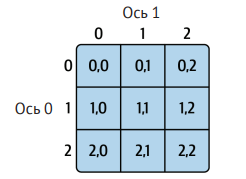

Если при работе с многомерным массивом опустить несколько последних
индексов, то будет возвращен объект ndarray меньшей размерности, содержащий данные по указанным при индексировании осям. Так, пусть имеется массив **arr3d** размерности 2×2×3:

In [109]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [110]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [111]:
arr3d[0, 0]

array([1, 2, 3])

In [112]:
old_values = arr3d[0].copy()
arr3d[0] = 42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [113]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### Индексирование срезами
Для объектов `ndarray` можно формировать срезы.

In [114]:
print(arr2d)
arr2d[:2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6]])

Срезы можно применять сразу по нескольким осям:

In [117]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [118]:
arr2d[2, 1:]

array([8, 9])

In [121]:
arr2d[:, 0]

array([1, 4, 7])

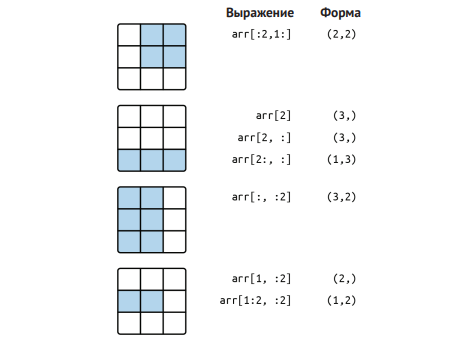

### Булево индексирование
Пусть имеется массив с данными и массив имен, содержащий дубликаты:

In [135]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])

print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


Допустим, что каждое имя соответствует строке в массиве data и мы хотим выбрать все строки, которым соответствует имя 'Bob'. Операции сравнения массивов (например, ==), как и арифметические, также векторизованы. Поэтому сравнение names со строкой 'Bob' дает массив булевых величин:


In [136]:
print(names == "Bob")

print(data[names=="Bob"])

[ True False False  True False False False]
[[4 7]
 [0 0]]


In [137]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [138]:
data[names == "Bob", 1]

array([7, 0])

Чтобы выбрать все, кроме "Bob", можно либо воспользоваться оператором сравнения `!=`, либо применить отрицание - условие, обозначаемое знаком `~`:

In [139]:
print(names != "Bob")
print(~(names == "Bob"))

[False  True  True False  True  True  True]
[False  True  True False  True  True  True]


Оператор `~` пригодится, когда требуется инвертировать массив, адресуемый переменной:


In [140]:
cond = names == "Bob"

data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Чтобы сформировать составное булево условие, включающее два из трех имен, воспользуемся булевыми операторами `&` (И) и `|` (ИЛИ):

In [141]:
mask = (names == "Bob") | (names == "Will")

data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

*Ключевые слова Python and и or с булевыми массивами не работают. Используйтевместо них & (и) и | (или).*


Если значение устанавливается с применением булева массива, то значения из массива в правой части копируются в левую часть **только тогда, когда значение соответствующего элемента булева массива равно True**. Например, чтобы заменить все отрицательные значения в массиве data нулями, нужно всего лишь написать:

In [142]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

### Прихотливое индексирование
Термином *прихотливое индексирование* в NumPy означается индексирование с помощью целочисленных массивов. 

In [143]:
arr = np.zeros((8, 4))

for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Чтобы выбрать подмножество строк в определенном порядке, можно просто передать список или массив целых чисел, описывающих желаемый порядок:

In [144]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [145]:
arr[[-5, -3, -1]]

array([[3., 3., 3., 3.],
       [5., 5., 5., 5.],
       [7., 7., 7., 7.]])

При передаче нескольких массивов делается несколько иное: выбирается одномерный массив элементов, соответствующих каждому кортежу индексов последовательно:

In [154]:
arr = np.arange(32).reshape(8, 4)

arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

Метод `reshape` изменяет форму массива на указанную.
Индексы преобразуются в кортежи `(1, 0), (5, 3), (7, 1), (2, 2)`.

In [155]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] # переставляет столбцы

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Имейте в виду, что прихотливое индексирование, в отличие от вырезания,
всегда копирует данные в новый массив, когда результат присваивается новой
переменной. Если присвоить значения с помощью прихотливого индексирования, то индексированные значения будут модифицированы.

### Транспонирование и перестановка осей
Транспонирование - частный случай изменения формы. У массивов имеется метод `transpose` и атрибут `T`:

In [158]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [159]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

При вычислениях с матрицами эта операция применяется очень часто.

Вот как вычисляется скалярное произведение двух матриц методом `numpy.dot`:

In [160]:
np.dot(arr, arr.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

Матрицы также можно перемножить с помощью `@`:

In [161]:
arr @ arr.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

У объекта ndarray есть метод `swapaxes`, который принимает пару номеров осей и меняет их местами:

In [162]:
arr.swapaxes(0, 1)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])